# Assignment 5 Part C - Anomaly Detection of Time-Series using TimeGPT

## Assignment Description
Create a Colab for performing anomaly detection in time series data using TimeGPT. Include clear, detailed explanations of the methodology and code.

### References
1. [Nixtla's Anomaly Detection Tutorial](https://docs.nixtla.io/docs/tutorials-anomaly_detection)


### Import Necessary Libraries

In [1]:
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.2 MB/s eta 0:00:00


In [3]:
from nixtla.utils import in_colab
import pandas as pd
from nixtla import NixtlaClient
from google.colab import userdata
NIXTLA_API_KEY = userdata.get('NIXTLA_API_KEY')

In [4]:
IN_COLAB = in_colab()

In [5]:
nixtla_client = NixtlaClient(
    api_key = NIXTLA_API_KEY
)

## Load Dataset

In [6]:
import pandas as pd
from datetime import datetime

In [7]:
def convert_date_to_readable_format(timestamp_col):
    return timestamp_col.apply(lambda x: datetime.utcfromtimestamp(x / 1000).strftime('%Y-%m-%d'))

In [8]:
data_url = 'https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/refs/heads/main/datasets/usdeur.csv'

In [24]:
import pandas as pd

# Load your dataset (replace with actual file path or dataset loading method)
df = pd.read_csv(data_url)

# Convert timestamp (in milliseconds) to datetime64[ns]
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)

# If you need it in a specific timezone, consider:
# df['timestamp'] = df['timestamp'].dt.tz_convert('UTC')  # or another timezone if needed

# Sort by timestamp
df = df.sort_values('timestamp')

# Remove duplicates if any
df = df.drop_duplicates(subset='timestamp')

# Set timestamp as the index
df = df.set_index('timestamp')

# Reindex to ensure a continuous daily frequency
df = df.asfreq('D')

# Forward-fill or backward-fill missing values if it makes sense for your data
df = df.ffill()

# Reset index if Nixtla expects a column rather than an index
df = df.reset_index()

# Now df has a clean daily datetime column 'timestamp' and consistent daily frequency
print(df.head())
print(df.dtypes)

# # Finally, run detect_anomalies
# anomalies_df = nixtla_client.detect_anomalies(df, freq='D')


                  timestamp   value
0 2007-01-01 00:00:00+00:00  0.7537
1 2007-01-02 00:00:00+00:00  0.7537
2 2007-01-03 00:00:00+00:00  0.7559
3 2007-01-04 00:00:00+00:00  0.7631
4 2007-01-05 00:00:00+00:00  0.7644
timestamp    datetime64[ns, UTC]
value                    float64
dtype: object


In [25]:
df.rename(columns={'timestamp': 'ds', 'value': 'y'}, inplace=True)
df.head()

,ds,y
0,2007-01-01 00:00:00+00:00,0.7537
1,2007-01-02 00:00:00+00:00,0.7537
2,2007-01-03 00:00:00+00:00,0.7559
3,2007-01-04 00:00:00+00:00,0.7631
4,2007-01-05 00:00:00+00:00,0.7644


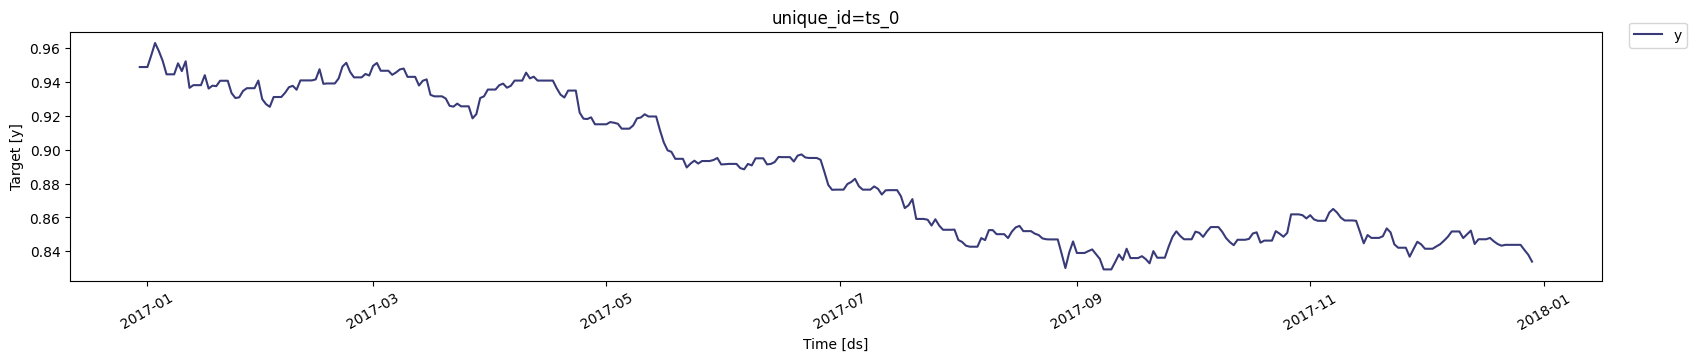

In [26]:
nixtla_client.plot(df, max_insample_length=365)

## Anomaly Detection

In [27]:
anomalies_df = nixtla_client.detect_anomalies(df, freq='D')
anomalies_df.head()

,ds,y,TimeGPT,TimeGPT-hi-99,TimeGPT-lo-99,anomaly
0,2007-02-03 00:00:00+00:00,0.7681,0.769424,0.788768,0.750080,False
1,2007-02-04 00:00:00+00:00,0.7681,0.769664,0.789008,0.750320,False
2,2007-02-05 00:00:00+00:00,0.7738,0.769438,0.788782,0.750094,False
3,2007-02-06 00:00:00+00:00,0.7720,0.768792,0.788135,0.749448,False
4,2007-02-07 00:00:00+00:00,0.7701,0.768821,0.788164,0.749477,False


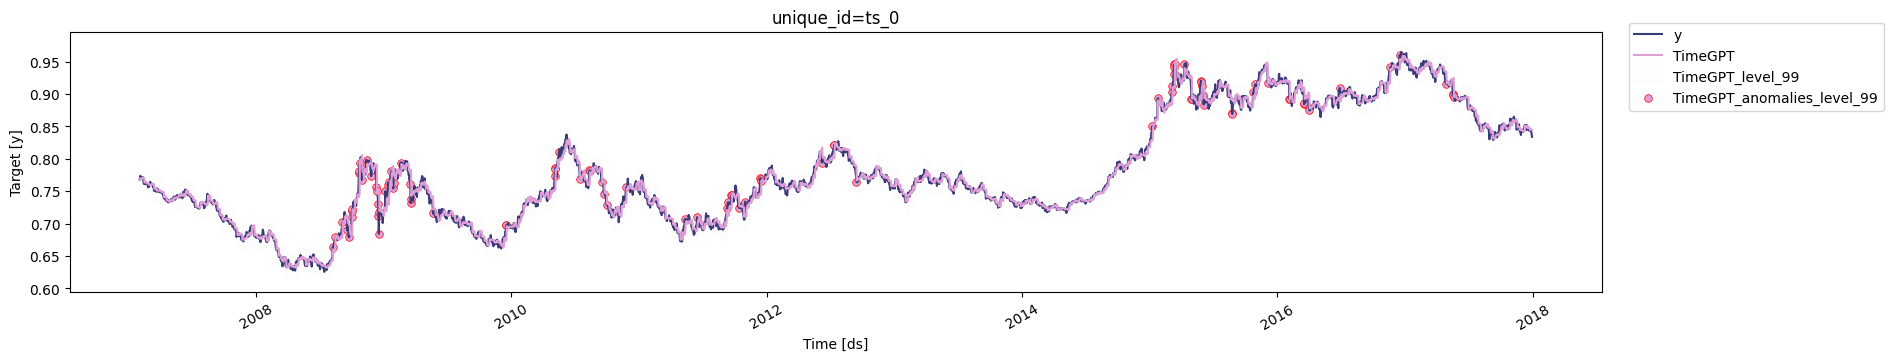

In [28]:
nixtla_client.plot(df, anomalies_df)

## Anomaly Detection with Exogenous Features

In [29]:
anomalies_df_x = nixtla_client.detect_anomalies(
    df,
    freq='D',
    date_features=['month', 'year'],
    date_features_to_one_hot=True,
)

<Axes: ylabel='features'>

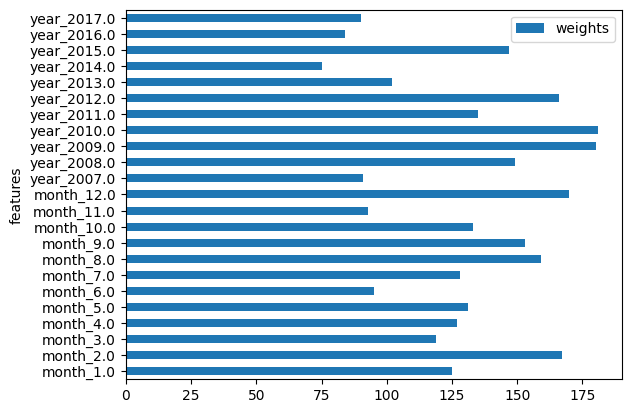

In [30]:
nixtla_client.weights_x.plot.barh(x='features', y='weights')

## Modifying the Confidence Intervals

In [31]:
anomalies_df = nixtla_client.detect_anomalies(
    df,
    freq='D',
    level=70
)

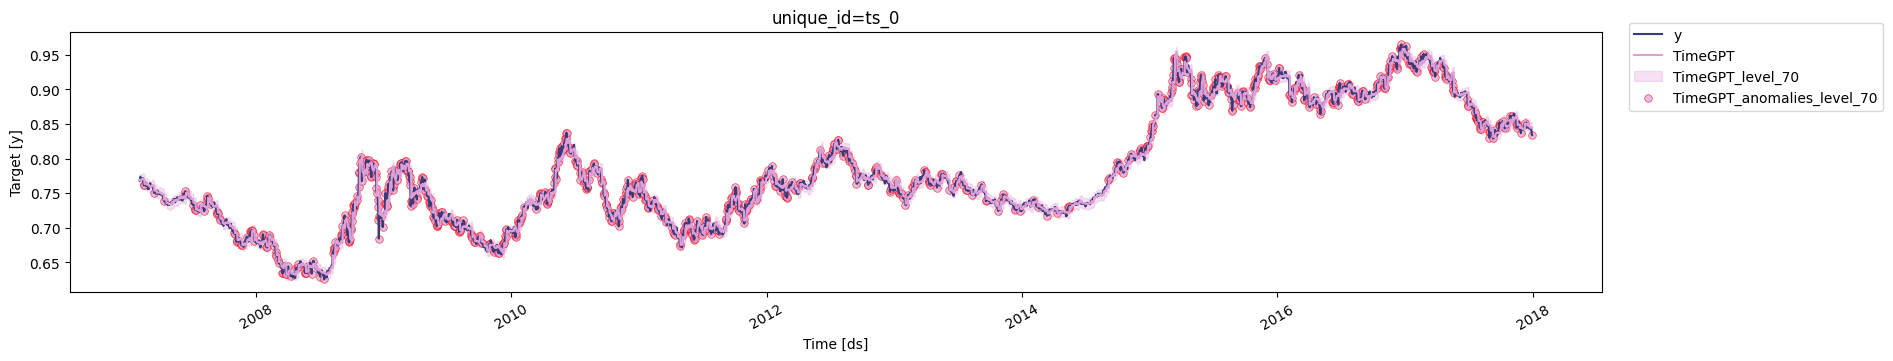

In [32]:
nixtla_client.plot(df, anomalies_df)